In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import jarque_bera

In [120]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000

In [121]:
DF = pd.read_excel('data/data8.xls')

In [122]:
# Percent of rented properties
DF['pctrnths'] = DF['rnthsg'] / DF['tothsg'] * 100

# Logarithm of percent of rented properties
DF['lpctrnths'] = np.log(DF['pctrnths'])

# Squared average income
DF['avgincsq'] = DF['avginc'] **2

In [123]:
DF80 = DF[DF['year'] == 80]
DF90 = DF[DF['year'] == 90]

## Simple linear regression with average income as only regressor

In [124]:
# Simple linear regression with average income as only regressor
X80 = DF80['avginc']
y80 = DF80['rent']
model80 = sm.OLS(y80, sm.add_constant(X80)).fit()
y80pred = sm.add_constant(X80) @ model80.params.values

print("##### Linear regression for 1980 #######")
print(model80.summary())

X90 = DF90['avginc']
y90 = DF90['rent']
model90 = sm.OLS(y90, sm.add_constant(X90)).fit()
y90pred = sm.add_constant(X90) @ model90.params.values

print()
print("##### Linear regression for 1990 #######")
print(model90.summary())

##### Linear regression for 1980 #######
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           3.18e-16
Time:                        14:59:35   Log-Likelihood:                -296.49
No. Observations:                  64   AIC:                             597.0
Df Residuals:                      62   BIC:                             601.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

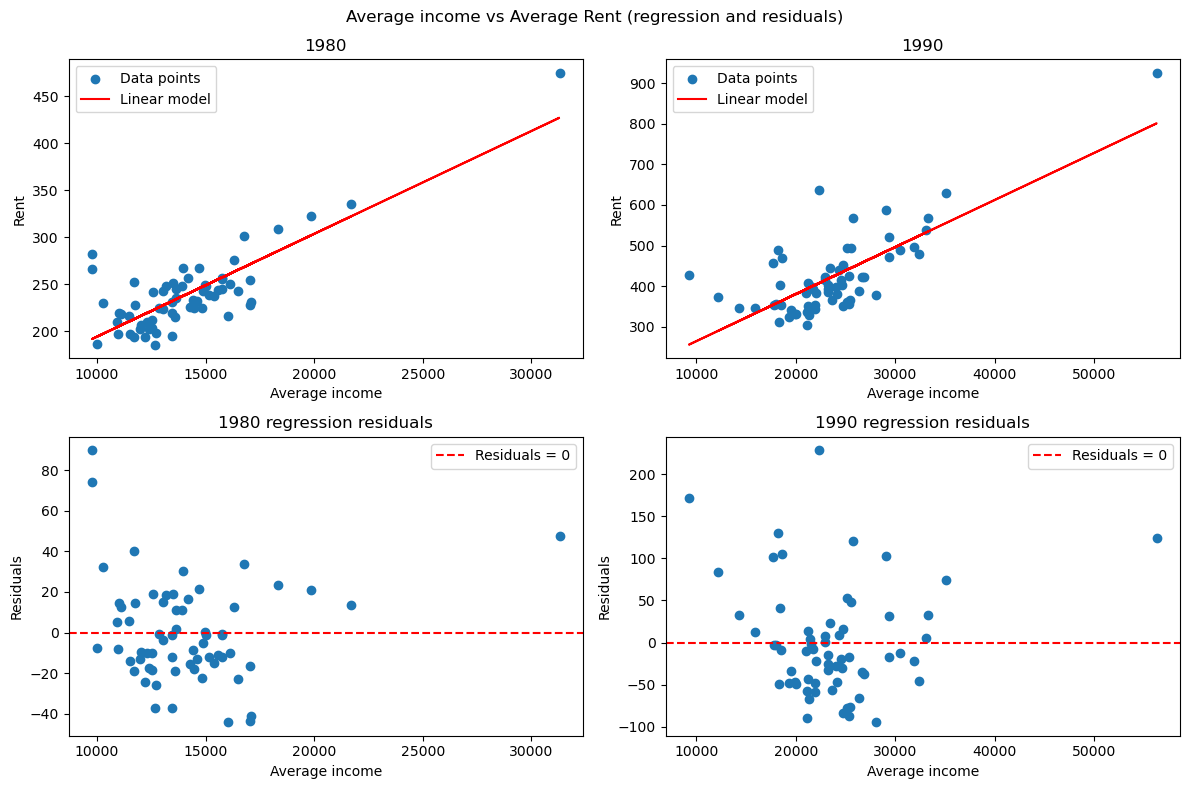

In [125]:
# Plot linear regression and its residuals
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.scatter(X80, y80, label='Data points')
ax1.plot(X80, model80.params.const + model80.params.avginc * X80, label='Linear model', color='red')

ax2.scatter(X90, y90, label='Data points')
ax2.plot(X90, model90.params.const + model90.params.avginc * X90, label='Linear model', color='red')

ax3.scatter(X80, model80.resid)
ax3.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax4.scatter(X90, model90.resid)
ax4.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax1.set_title('1980')
ax1.set_xlabel("Average income")
ax1.set_ylabel("Rent")
ax1.legend()

ax2.set_title('1990')
ax2.set_xlabel("Average income")
ax2.set_ylabel("Rent")
ax2.legend()

ax3.set_title('1980 regression residuals')
ax3.set_xlabel("Average income")
ax3.set_ylabel("Residuals")
ax3.legend()

ax4.set_title('1990 regression residuals')
ax4.set_xlabel("Average income")
ax4.set_ylabel("Residuals")
ax4.legend()

plt.suptitle('Average income vs Average Rent (regression and residuals)')
plt.tight_layout()
plt.show()

## Multiple linear regression with following regressors: population, percent students, percent rented properties, average income

In [126]:
# Adding more parameters to linear regression to improve the fit of the model (1980)
X80 = DF80[['pop', 'pctstu', 'pctrnths', 'avginc']]
y80 = DF80['rent']

model80ex = sm.OLS(y80, sm.add_constant(X80)).fit()
y80predex = sm.add_constant(X80) @ model80ex.params.values

print(model80ex.summary())

# Adding more parameters to linear regression to improve the fit of the model (1990)
X90 = DF90[['pop', 'pctstu', 'pctrnths', 'avginc']]
y90 = DF90['rent']

model90ex = sm.OLS(y90, sm.add_constant(X90)).fit()
y90predex = sm.add_constant(X90) @ model90ex.params.values

print(model90ex.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     59.69
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           4.50e-20
Time:                        14:59:35   Log-Likelihood:                -279.37
No. Observations:                  64   AIC:                             568.7
Df Residuals:                      59   BIC:                             579.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7608     26.512     -1.575      0.1

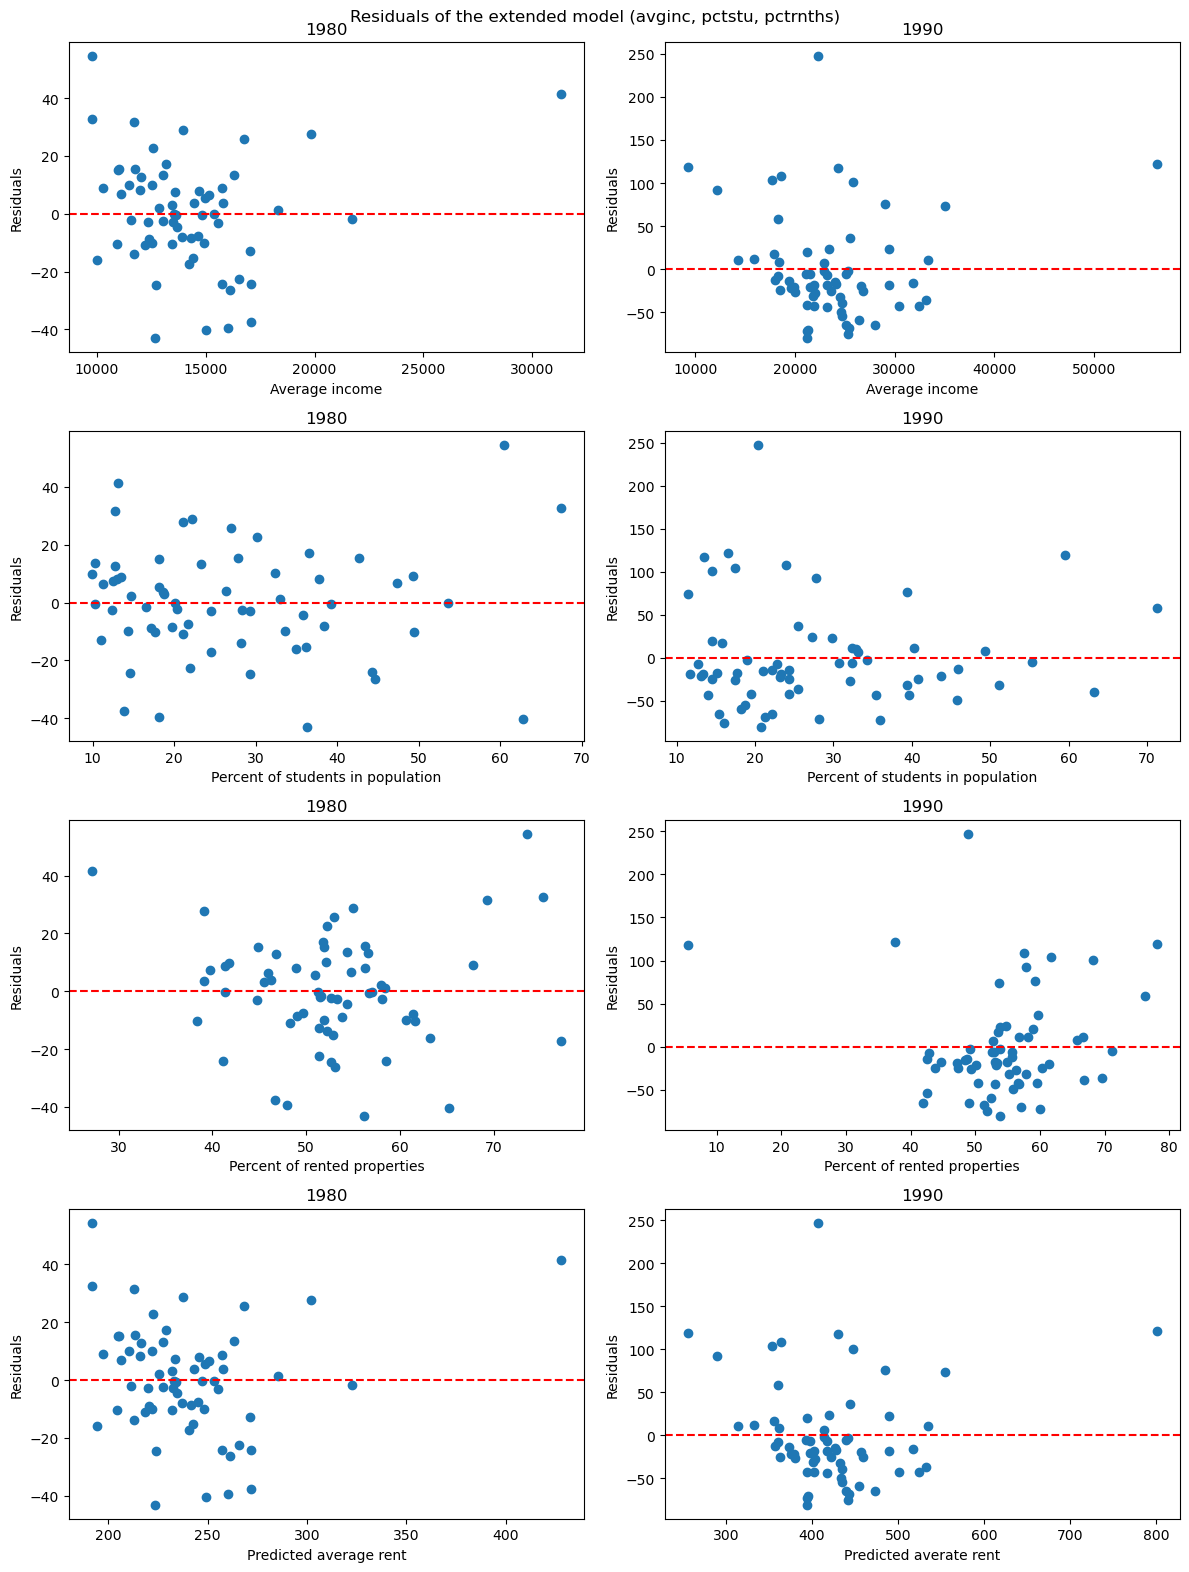

In [127]:
def populate_subplot(ax, x, resid, title, xlabel):
    ax.scatter(x, resid)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Residuals")

# Plot residuals in relation to different params and to predicted values
_, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 16))

populate_subplot(ax1, X80[['avginc']], model80ex.resid, '1980', xlabel="Average income")
populate_subplot(ax2, X90[['avginc']], model90ex.resid, '1990', xlabel="Average income")
populate_subplot(ax3, X80[['pctstu']], model80ex.resid, '1980', xlabel="Percent of students in population")
populate_subplot(ax4, X90[['pctstu']], model90ex.resid, '1990', xlabel="Percent of students in population")
populate_subplot(ax5, X80[['pctrnths']], model80ex.resid, '1980', xlabel="Percent of rented properties")
populate_subplot(ax6, X90[['pctrnths']], model90ex.resid, '1990', xlabel="Percent of rented properties")
populate_subplot(ax7, y80pred, model80ex.resid, '1980', xlabel="Predicted average rent")
populate_subplot(ax8, y90pred, model90ex.resid, '1990', xlabel="Predicted averate rent")

plt.suptitle('Residuals of the extended model (avginc, pctstu, pctrnths)')
plt.tight_layout()
plt.show()

## Testing linear model assumptions
1. Model is linear
2. Matrix is non-random and has rank k
3. Error $u$ has $E(u)=0$ and $var(u)=\sigma^{2}I_{n}$
4. Error $u$ follows normal distribution

1. Model is linear
From the plots of the residuals we can see that there is no function misspecification and so we conclude that model is linear.

2. Matrix is non-random and has rank k
We can not check data for randomness.
If we take a look at the correlation matrix of the parameters we used in the model we see that they are not closely correlated, so we can conclude that data matrix has full rank.

In [128]:
# Correlation matrix
DF[['pop', 'pctstu', 'avginc', 'pctrnths']].corr(numeric_only=True)[['pop', 'pctstu', 'avginc', 'pctrnths']]

,pop,pctstu,avginc,pctrnths
pop,1.000000,-0.432984,0.187568,-0.156864
pctstu,-0.432984,1.000000,-0.175957,0.609148
avginc,0.187568,-0.175957,1.000000,-0.187621
pctrnths,-0.156864,0.609148,-0.187621,1.000000


3. Error $u$ has $E(u)=0$ and $var(u)=\sigma^{2}I_{n}$
We see that mean of residuals is quite close to 0, so there is reason to believe that expected values of the error term is also 0.
From the plots of the residuals we can see that variance is not changing much depending on the values of the regressor, so we can assume that $var(u)=\sigma^{2}I_{n}$.

In [129]:
print("Mean of residuals for extended linear model for 1980: ", np.average(model80ex.resid))
print("Mean of residuals for extended linear model for 1990: ", np.average(model90ex.resid))

Mean of residuals for extended linear model for 1980:  5.773159728050814e-14
Mean of residuals for extended linear model for 1990:  1.3500311979441904e-13


4. Error $u$ follows normal distribution
Using Jaque-Bera test and histograms of the residuals we can conclude that residuals do not follow normal distribution.
What does it mean for our distribution?

In [130]:
print("Jaque-Bera test for residuals of extended linear model for 1980: ", jarque_bera(model80ex.resid))
print("Jaque-Bera test for residuals of extended linear model for 1990: ", jarque_bera(model90ex.resid))

Jaque-Bera test for residuals of extended linear model for 1980:  SignificanceResult(statistic=0.6209492297762935, pvalue=0.7330989339740029)
Jaque-Bera test for residuals of extended linear model for 1990:  SignificanceResult(statistic=54.34028924150875, pvalue=1.5854630268531777e-12)


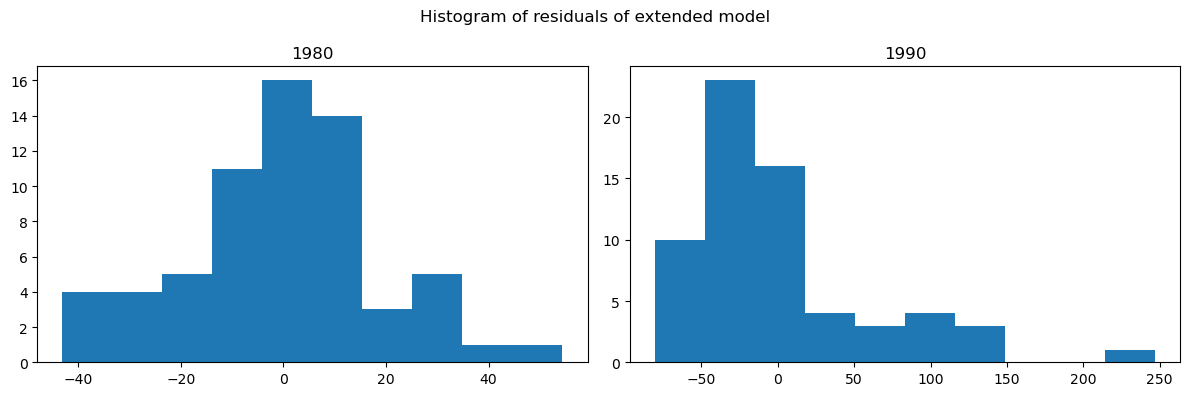

In [131]:
# Plot histogram of residuals for extended model
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(model80ex.resid)
ax2.hist(model90ex.resid)

ax1.set_title('1980')
ax2.set_title('1990')

plt.suptitle('Histogram of residuals of extended model')
plt.tight_layout()
plt.show()

## Testing whether population is 10 times more important that percent of students in the population
For the extended linear model that includes params: 'pop', 'pctstu', 'pctrnths', 'avginc'.

$H_0: \beta_1 - \beta_2 \cdot 10 = 0$ vs $H_1: \beta_1 - \beta_2 \cdot 10 \neq 0$
We can use single linear restriction test
$t_n = \frac{w'\hat\beta - r}{\sqrt{s^2 w'(X'X)^{-1}w}}\sim t_{(n-k)}$
where $w' = [1, -10, 0, 0]$ and $r' = [0, 0, 0, 0]$.
$s^2 = \frac{e'e}{n-k}$
With $n = 64$ and $k = 4$ we will use $t_{(60)} = 2.00$ as critical values for two-sided test with $\alpha = 0.05$.

In [132]:
def t_test(model, X, r):
    beta = model.params.values
    w = np.array(r).T
    e = model.resid
    n = len(X)
    k = len(beta)
    s2 = (e.T@e)/(n-k)
    XX = np.linalg.inv(X.T@X)
    numerator = w.T@beta
    denominator = np.sqrt(s2 * (w.T@XX@w))
    return numerator / denominator

r = [0, 1, -10, 0, 0]
print("T-test value for testing linear restriction for 1980:", t_test(model80ex, sm.add_constant(X80), r))
print("T-test value for testing linear restriction for 1990:", t_test(model90ex, sm.add_constant(X90), r))

T-test value for testing linear restriction for 1980: -1.9770103887795838
T-test value for testing linear restriction for 1990: -0.9936119805784714


In [133]:
# Same T-test using statsmodels.model.t_test function. Results are matching our results.
test_result = model80ex.t_test('pop = 10 * pctstu')
print("1980")
print(test_result.summary())

test_result = model90ex.t_test('pop = 10 * pctstu')
print()
print("1990")
print(test_result.summary())

1980
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -4.9642      2.511     -1.977      0.053      -9.989       0.060

1990
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -8.0226      8.074     -0.994      0.324     -24.179       8.134


## MSE and MAE for simple model

In [134]:
def mean_square_error(prediction, actual):
    return np.mean((prediction - actual) ** 2)


def mean_absolute_error(prediction, actual):
    return np.mean(np.abs(prediction - actual))

In [135]:
print("MSE for 80s: ", mean_square_error(y80pred, DF80['rent']))
print("MSE for 90s: ", mean_square_error(y90pred, DF90['rent']))
print("MAE for 80s: ", mean_absolute_error(y80pred, DF80['rent']))
print("MAE for 90s: ", mean_absolute_error(y90pred, DF90['rent']))

MSE for 80s:  618.6361937815333
MSE for 90s:  4292.0810668474
MAE for 80s:  18.88900167418278
MAE for 90s:  49.27689034122351


## MSE and MAE for extended model

In [136]:
print("MSE for 80s: ", mean_square_error(y80predex, DF80['rent']))
print("MSE for 90s: ", mean_square_error(y90predex, DF90['rent']))
print("MAE for 80s: ", mean_absolute_error(y80predex, DF80['rent']))
print("MAE for 90s: ", mean_absolute_error(y90predex, DF90['rent']))

MSE for 80s:  362.26716528959633
MSE for 90s:  3573.400967019027
MAE for 80s:  14.44591950222192
MAE for 90s:  43.34553240158388
